In [ ]:
!pip install opencv-python-headless ipywidgets ipywebrtc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.5 MB/s eta 0:00:00


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ipywebrtc import CameraStream
import numpy as np

# Create camera stream
camera = CameraStream()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


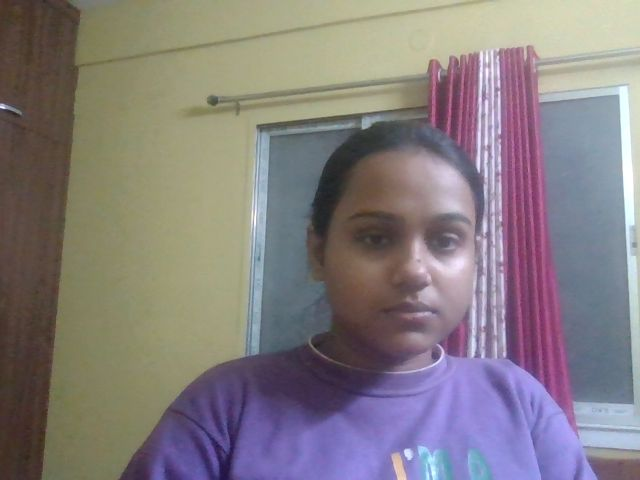

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pip install torch torchvision torchaudio
# Import necessary libraries
from PIL import Image
import torch

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or any other model you want to use

# Load image
try:
    img = Image.open("photo.jpg") # Update with the correct path to the image file in your Linux environment
    # Perform inference
    results = model(img)

    # Print results
    results.print()  # prints detected objects
except Exception as e:
    print(f"Error opening image: {e}")
    # Add any handling you'd like to do if the image doesn't open, such as exiting the program

INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cu121
    Uninstalling torchaudio-2.5.1+cu121:
      Successfully uninstalled torchaudio-2.5.1+cu121


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


requirements: Ultralytics requirement ['pillow>=10.3.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0

requirements: AutoUpdate success ✅ 4.1s, installed 1 package: ['pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2025-1-28 Python-3.11.11 torch-2.2.2+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
image 1/1: 480x640 1 person
Speed: 35.8ms pre-process, 550.7ms inference, 3.4ms NMS per image at shape (1, 3, 480, 640)


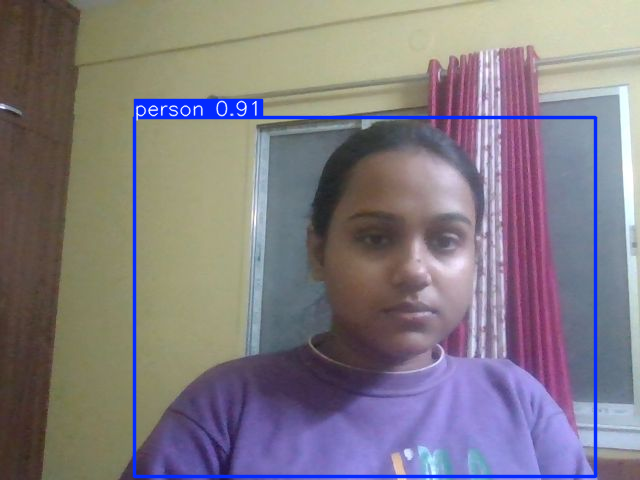

Saved 1 image to runs/detect/exp4


In [ ]:
# Render results on image
results.show()

# Optionally, save the output image with bounding boxes
results.save('photo.jpg')

In [ ]:
!pip install opencv-python fer

  Using cached pillow-10.2.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached pillow-10.2.0-cp311-cp311-manylinux_2_28_x86_64.whl (4.5 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0


Detected emotions: {'angry': 0.01, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.0, 'sad': 0.04, 'surprise': 0.01, 'neutral': 0.93}
Dominant emotion: neutral


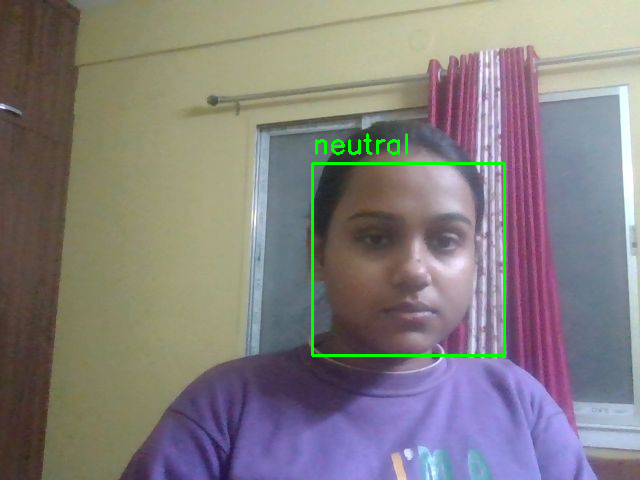

In [ ]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow # Import the cv2_imshow function from google.colab.patches

# Load the image
image_path = "/content/photo.jpg"  # Replace with your image path
image = cv2.imread(image_path) # Pass the image_path variable as an argument

# Initialize FER (Facial Emotion Recognition) detector
emotion_detector = FER() # Remove image_path as an argument. The default cascade file will be used.

# Detect emotions in the image
emotion_result = emotion_detector.detect_emotions(image)

# Display the results
if emotion_result:
    for face in emotion_result:
        emotions = face['emotions']
        dominant_emotion = max(emotions, key=emotions.get)
        print(f"Detected emotions: {emotions}")
        print(f"Dominant emotion: {dominant_emotion}")
else:
    print("No faces detected.")

# Optional: Draw bounding boxes and emotion on the image
for face in emotion_result:
    bounding_box = face["box"]
    emotions = face["emotions"]
    dominant_emotion = max(emotions, key=emotions.get)

    # Draw rectangle around the face
    cv2.rectangle(image,
                  (bounding_box[0], bounding_box[1]),
                  (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                  (0, 255, 0), 2)

    # Put the dominant emotion text
    cv2.putText(image, dominant_emotion,
                (bounding_box[0], bounding_box[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with detected emotions
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from fer import FER
from google.colab.patches import cv2_imshow

# Ground truth emotions for a set of images - extended to match the number of images
ground_truth_emotions = ['angry', 'fear', 'happy', 'neutral','sad', 'surprise',
                         'angry', 'fear', 'happy', 'neutral','sad', 'surprise',
                         'angry', 'fear', 'happy', 'neutral','sad', 'surprise',
                         'angry', 'fear', 'happy', 'neutral','sad', 'surprise']

# List of images to process
image_paths = [
    '/content/drive/MyDrive/emotion-archive/test_images/0/angry.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/0/fear.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/0/happy.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/0/neutral.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/0/sad.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/0/surprise.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/angry.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/fear.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/happy.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/neutral.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/sad.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/1/surprise.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/angry.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/fear.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/happy.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/neutral.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/sad.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/2/surprise.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/angry.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/fear.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/happy.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/neutral.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/sad.jpg',
    '/content/drive/MyDrive/emotion-archive/test_images/3/surprise.jpg',
]

# Initialize the FER emotion detector
emotion_detector = FER()

# Variables to track accuracy
correct_predictions = 0
total_predictions = len(image_paths)

# Loop through images and calculate accuracy
for idx, image_path in enumerate(image_paths):
    # Load each image and check if it loaded correctly
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Could not load image at {image_path}. Check the file path and permissions.")
        continue # Skip to the next image

    # Detect emotions in the image
    emotion_result = emotion_detector.detect_emotions(image)

    if emotion_result:  # If faces are detected
        for face in emotion_result:
            emotions = face['emotions']
            dominant_emotion = max(emotions, key=emotions.get)

            # Compare predicted emotion with ground truth
            if dominant_emotion == ground_truth_emotions[idx]:
                correct_predictions += 1
            print(f"Ground truth: {ground_truth_emotions[idx]} | Detected: {dominant_emotion}")
    else:
        print(f"No faces detected in {image_path}")

# Calculate accuracy
accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy: {accuracy:.2f}%")

Ground truth: angry | Detected: angry
Ground truth: fear | Detected: fear
Ground truth: happy | Detected: happy
Ground truth: neutral | Detected: neutral
Ground truth: sad | Detected: sad
Ground truth: surprise | Detected: surprise
Ground truth: angry | Detected: angry
Ground truth: fear | Detected: fear
Ground truth: happy | Detected: happy
Ground truth: neutral | Detected: neutral
Ground truth: sad | Detected: sad
Ground truth: surprise | Detected: surprise
Ground truth: angry | Detected: angry
Ground truth: fear | Detected: fear
Ground truth: happy | Detected: happy
Ground truth: neutral | Detected: neutral
Ground truth: sad | Detected: sad
Ground truth: surprise | Detected: surprise
Ground truth: angry | Detected: angry
Ground truth: fear | Detected: fear
Ground truth: happy | Detected: happy
Ground truth: happy | Detected: sad
Ground truth: neutral | Detected: neutral
Ground truth: sad | Detected: neutral
Ground truth: surprise | Detected: neutral
Accuracy: 91.67%


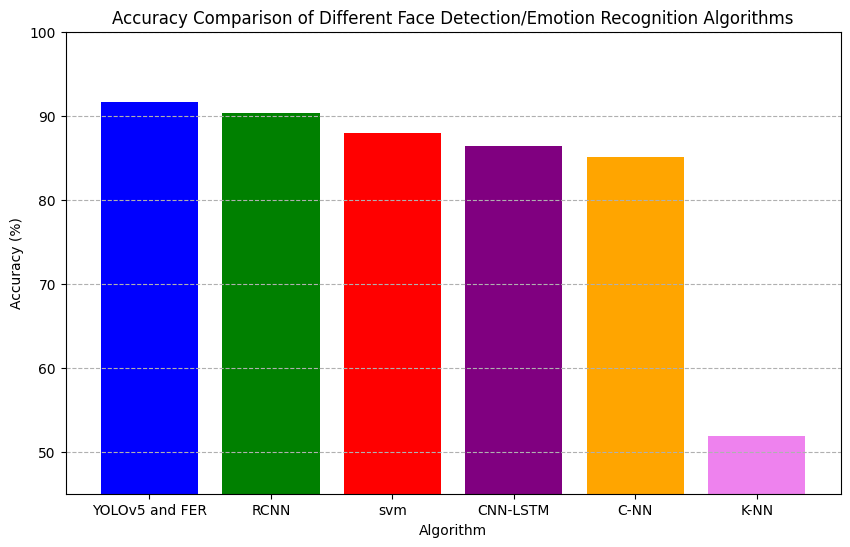

In [ ]:
import matplotlib.pyplot as plt

# Example accuracy values for each algorithm (replace with real' values)
algorithms = ['YOLOv5 and FER', 'RCNN','svm', 'CNN-LSTM','C-NN','K-NN' ]
accuracies = [91.65, 90.3, 87.9,86.42,85.1,51.82]  # Replace with actual accuracy values

# Create the accuracy comparison graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange','violet'])

# Adding details to the graph
plt.title('Accuracy Comparison of Different Face Detection/Emotion Recognition Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.ylim(45, 100)  # Adjust the Y-axis to show better detail if all accuracies are close
plt.grid(True, axis='y', linestyle='--')

# Display the graph
plt.show()

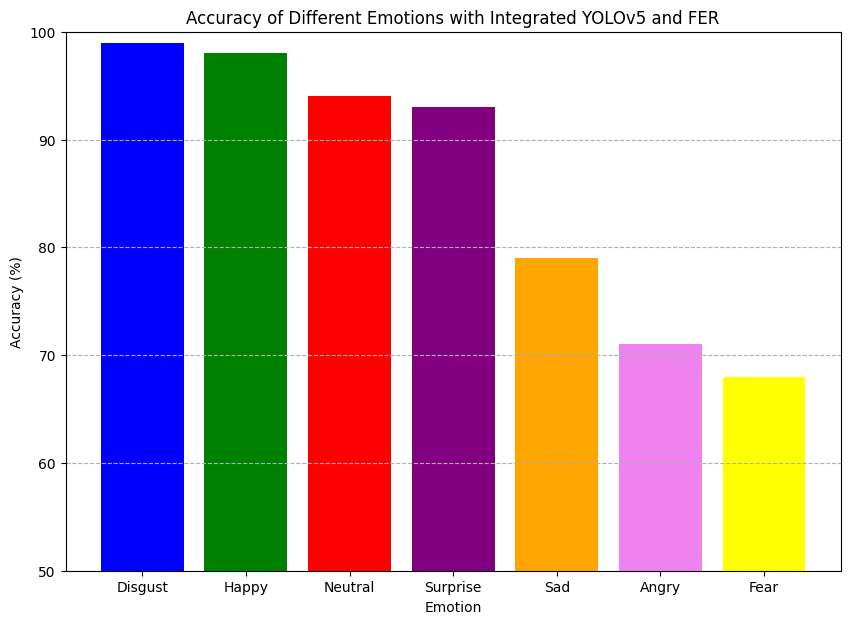

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for each emotion
algorithms = ['Disgust', 'Happy', 'Neutral', 'Surprise', 'Sad', 'Angry', 'Fear']
accuracies = [99, 98, 94, 93, 79, 71, 68]  # Example accuracy values

# Create the accuracy comparison graph
plt.figure(figsize=(10, 7))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'violet','yellow'])

# Adding details to the graph
plt.title('Accuracy of Different Emotions with Integrated YOLOv5 and FER')
plt.xlabel('Emotion')
plt.ylabel('Accuracy (%)')
plt.ylim(50, 100)  # Adjust the Y-axis to show better detail
plt.grid(True, axis='y', linestyle='--')

# Display the graph
plt.show()